***Exploratory data analysis (BI)***
\
Notebook as a followup to gulas16/eda.ipynb, where the goal was to look at distributions and more general relationships. Here we look for more audience-friendly conclusions.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from dotenv import load_dotenv

load_dotenv()
import os

In [3]:
# get data
DATA_DIR = './Data/'
FILE = 'spotify_tracks_kaggle_weekly.csv'
# FILE = 'spotify_2023.csv'

In [4]:
data = pd.read_csv(DATA_DIR + FILE, encoding='latin-1')

**previously in eda**


*initial*:
- counts for popularity scores
- mean popularity score for each language
- popularity score by year of release
- count bias for popularity/year
- counts for languages -> second is 'unknown' (null analysis subject?)

*distribution*:
- counts of numeric and categorical attributes
- distribution of all numeric tested against log and sqrt
- outliers for numeric attributes
- correlation analysis
- normality testing -> transformations needed 


***RELEVANT ATTRIBUTES*** as a first look.

In [5]:
data.columns

Index(['track_id', 'track_name', 'artist_name', 'year', 'popularity',
       'artwork_url', 'album_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'track_url', 'language'],
      dtype='object')

Some features that are accessible to a broader audience: 
- time_signature - 3/4 - waltz, 4/4 - common time, most pop songs, 5-6-7/4 - jazzy  (categorical)
- tempo 
- key + mode - C major, A minor, etc (categorical)
- duration_ms 

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,62317.0,2014.425935,9.645113,1971.0,2011.0000,2017.000000,2022.0000,2024.000
popularity,62317.0,15.358361,18.626908,0.0,0.0000,7.000000,26.0000,93.000
acousticness,62317.0,0.362292,0.314609,-1.0,0.0671,0.286000,0.6320,0.996
danceability,62317.0,0.596807,0.186209,-1.0,0.4970,0.631000,0.7300,0.986
duration_ms,62317.0,242527.040021,112999.932607,5000.0,192160.0000,236267.000000,286240.0000,4581483.000
energy,62317.0,0.602496,0.246144,-1.0,0.4400,0.639000,0.8030,1.000
instrumentalness,62317.0,0.146215,0.307804,-1.0,0.0000,0.000025,0.0152,0.999
key,62317.0,5.101658,3.553469,-1.0,2.0000,5.000000,8.0000,11.000
liveness,62317.0,0.194143,0.172030,-1.0,0.0932,0.125000,0.2430,0.998
loudness,62317.0,-65.103433,2369.051478,-100000.0,-10.7270,-7.506000,-5.4560,1.233


*time signatures*

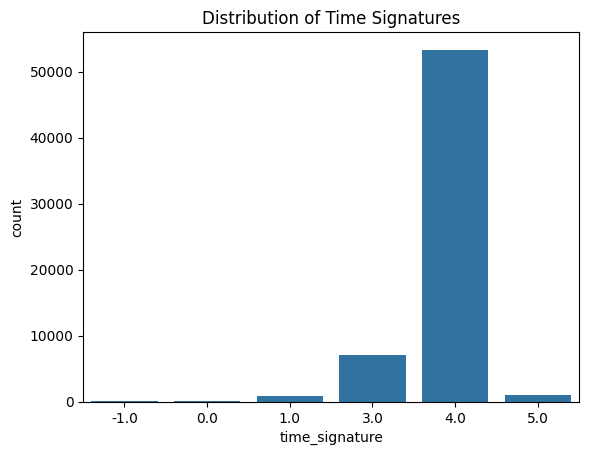

time_signature
 4.0    53332
 3.0     7071
 5.0     1000
 1.0      856
-1.0       35
 0.0       23
Name: count, dtype: int64

In [7]:
sns.countplot(x='time_signature', data=data)
plt.title('Distribution of Time Signatures')
plt.show()
data['time_signature'].value_counts()

the dataset described the column as ranging from 3/4 to 7/4, yet we see values -1,0 and 1. (expect values from 3 - 7). 
We can see that the two most common time signatures are 4/4(standard) and 3/4(waltz) which was to be expected.
Since this audio feature is just estimated using some machine learning model and time signatures outside these two are not that common, 
the models dont really have the capacity to categorize them correctly, so there is a possibility to a lot of 4/4 and 3/4 ts are misclassified.

In [9]:
# rows with time signature 0,-1,1
data[(data['time_signature'] == 0)].head()
data[(data['time_signature'] == -1)].head()
data[(data['time_signature'] == 1)].head()

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
28,2nNdxaWzV7SZTRlVlJ9DxN,"Not Ramaiya Vastavaiya (From ""Jawan"")","Anirudh Ravichander, Sreerama Chandra, Rakshit...",2024,0,https://i.scdn.co/image/ab67616d0000b2732b4e56...,Tollywood Relaxation Radio,0.0283,0.703,202556.0,...,10.0,0.301,-5.157,0.0,0.0616,99.687,1.0,0.263,https://open.spotify.com/track/2nNdxaWzV7SZTRl...,Tamil
30,5NLeBVbZQzYsyw4lJjV44L,"Not Ramaiya Vastavaiya (From ""Jawan"")","Anirudh Ravichander, Sreerama Chandra, Rakshit...",2024,0,https://i.scdn.co/image/ab67616d0000b2737aceca...,Holi Non Stop Dhamaka Hits,0.0283,0.703,202556.0,...,10.0,0.301,-5.157,0.0,0.0616,99.687,1.0,0.263,https://open.spotify.com/track/5NLeBVbZQzYsyw4...,Tamil
37,4TMaJHZPugXuxsMphw0zsb,"Not Ramaiya Vastavaiya (From ""Jawan"")","Anirudh Ravichander, Sreerama Chandra, Rakshit...",2024,0,https://i.scdn.co/image/ab67616d0000b273fd6746...,Sankranti Pandem Kollu,0.0283,0.703,202556.0,...,10.0,0.301,-5.157,0.0,0.0616,99.687,1.0,0.263,https://open.spotify.com/track/4TMaJHZPugXuxsM...,Tamil
105,7lAVFxl7BhkE1YsrmfgCYg,"Not Ramaiya Vastavaiya [From ""Jawan""] [TELUGU]","Anirudh Ravichander, Sreerama Chandra, Rakshit...",2023,42,https://i.scdn.co/image/ab67616d0000b2735a3f5b...,"Not Ramaiya Vastavaiya (From ""Jawan"") [TELUGU]",0.0283,0.703,202556.0,...,10.0,0.301,-5.157,0.0,0.0616,99.687,1.0,0.263,https://open.spotify.com/track/7lAVFxl7BhkE1Ys...,Telugu
131,32Sd8XWgTEsCD5gbB0yhYA,Not Ramaiya Vastavaiya (TELUGU),"Anirudh Ravichander, Sreerama Chandra, Rakshit...",2023,41,https://i.scdn.co/image/ab67616d0000b27394d833...,Jawan (TELUGU),0.0283,0.703,202556.0,...,10.0,0.301,-5.157,0.0,0.0616,99.687,1.0,0.263,https://open.spotify.com/track/32Sd8XWgTEsCD5g...,Telugu


Entries with 0,-1 or 1 time signature have either extremely low popularity and other scores or completely invalid values (negative values for acousticness, danceability etc), some entries that might be considered either dropping or ignoring 

*tempo*

C:\Users\Róbert\AppData\Local\Temp\ipykernel_2360\2593724919.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['tempo'])


<Axes: xlabel='tempo', ylabel='Density'>

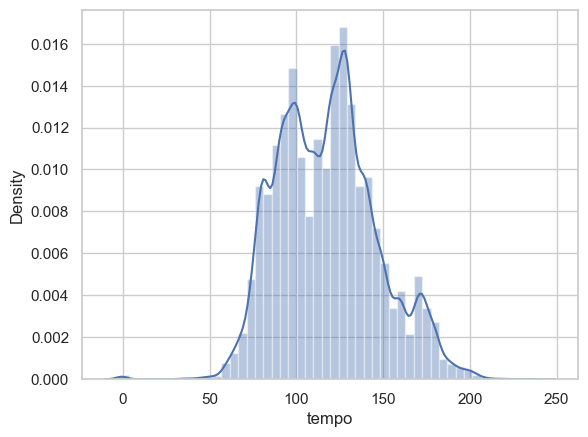

In [17]:
# plot tempo distribution
sns.distplot(data['tempo'])

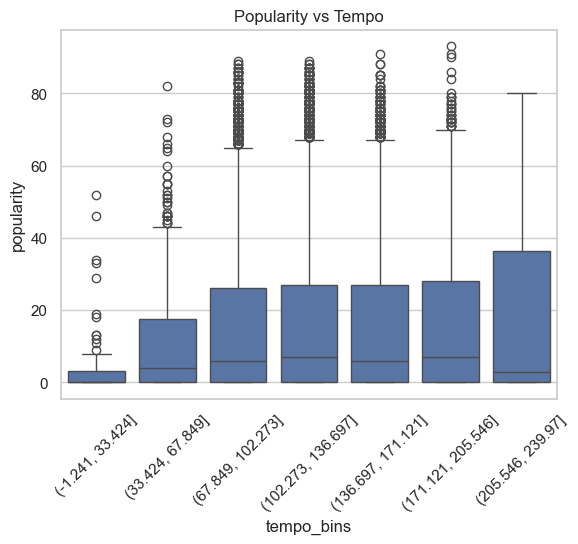

In [21]:
data['tempo_bins'] = pd.cut(data['tempo'], bins=7) 

# Create a box plot
sns.boxplot(x='tempo_bins', y='popularity', data=data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Popularity vs Tempo')
plt.show()


In [22]:
# correlation tempo and popularity
data[['tempo', 'popularity']].corr()



,tempo,popularity
tempo,1.000000,0.028823
popularity,0.028823,1.000000


Not much. We could consider splitting data into 'popular' and 'unpopular' , above 70 and below 30 respectively.

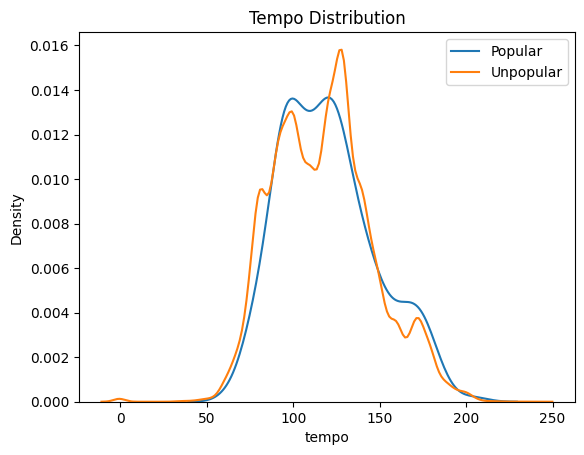

,tempo,popularity
tempo,1.000000,0.002976
popularity,0.002976,1.000000


In [11]:
# split data into popular and unpopular
popular = data[data['popularity'] > 70]
unpopular = data[data['popularity'] < 30]

correlation_popular = popular[['tempo', 'popularity']].corr()
correlation_unpopular = unpopular[['tempo', 'popularity']].corr()

# copare
sns.kdeplot(popular['tempo'], label='Popular')
sns.kdeplot(unpopular['tempo'], label='Unpopular')
plt.legend()
plt.title('Tempo Distribution')
plt.show()

correlation_popular
# correlation_unpopular



There isnt much difference in the distribution of popular and unpopular tracks in terms of tempo, except a valley near the mean of unpopular tracks.

*key + mode*

<Axes: xlabel='key', ylabel='count'>

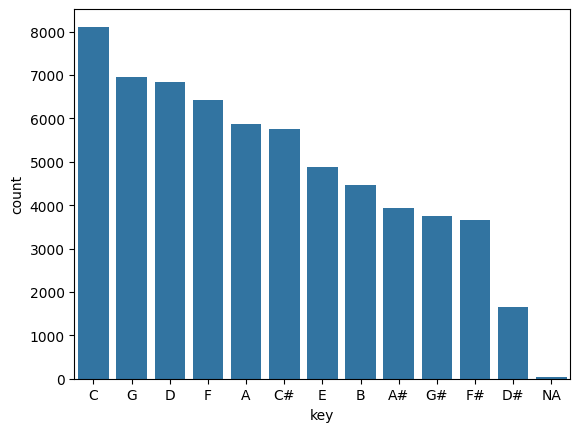

In [12]:
copy_data = data.copy()
# change key from -1 to 11 to nan, C, c# etc
copy_data['key'] = copy_data['key'].replace(-1, 'NA')
copy_data['key'] = copy_data['key'].replace(0, 'C')
copy_data['key'] = copy_data['key'].replace(1, 'C#')
copy_data['key'] = copy_data['key'].replace(2, 'D')
copy_data['key'] = copy_data['key'].replace(3, 'D#')
copy_data['key'] = copy_data['key'].replace(4, 'E')
copy_data['key'] = copy_data['key'].replace(5, 'F')
copy_data['key'] = copy_data['key'].replace(6, 'F#')
copy_data['key'] = copy_data['key'].replace(7, 'G')
copy_data['key'] = copy_data['key'].replace(8, 'G#')
copy_data['key'] = copy_data['key'].replace(9, 'A')
copy_data['key'] = copy_data['key'].replace(10, 'A#')
copy_data['key'] = copy_data['key'].replace(11, 'B')

# plot key distribution
copy_data.sort_values('key', inplace=True)
# sns.countplot(x='key', data=copy_data)
sns.countplot(x='key', data=copy_data, order=copy_data['key'].value_counts().index)







([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'C Major'),
  Text(1, 0, 'G Major'),
  Text(2, 0, 'D Major'),
  Text(3, 0, 'C# Major'),
  Text(4, 0, 'F Minor'),
  Text(5, 0, 'A Major'),
  Text(6, 0, 'F Major'),
  Text(7, 0, 'B Minor'),
  Text(8, 0, 'A Minor'),
  Text(9, 0, 'G# Major'),
  Text(10, 0, 'E Minor'),
  Text(11, 0, 'C Minor'),
  Text(12, 0, 'A# Minor'),
  Text(13, 0, 'E Major'),
  Text(14, 0, 'F# Minor'),
  Text(15, 0, 'D Minor'),
  Text(16, 0, 'G Minor'),
  Text(17, 0, 'F# Major'),
  Text(18, 0, 'C# Minor'),
  Text(19, 0, 'A# Major'),
  Text(20, 0, 'B Major'),
  Text(21, 0, 'G# Minor'),
  Text(22, 0, 'D# Major'),
  Text(23, 0, 'D# Minor'),
  Text(24, 0, 'NA NA')])

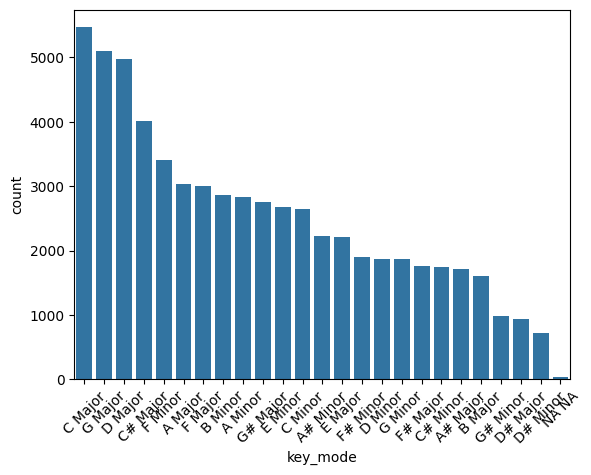

In [13]:
# combine key and mode column

# replace mode numbers with major and minor
copy_data['mode'] = copy_data['mode'].replace(-1, 'NA')
copy_data['mode'] = copy_data['mode'].replace(0, 'Minor')
copy_data['mode'] = copy_data['mode'].replace(1, 'Major')

copy_data['key_mode'] = copy_data['key'] + ' ' + copy_data['mode']

# plot key_mode distribution
# copy_data.sort_values('key_mode', inplace=True)
sns.countplot(x='key_mode', data=copy_data, order=copy_data['key_mode'].value_counts().index)
plt.xticks(rotation=45)

So the most popular keys are C, G and D major. These are usually associated with happy soundinng melodies and similar. So another thing to look at might be attributes like valence or energy.


*duration_ms*

<Axes: xlabel='duration_min', ylabel='Density'>

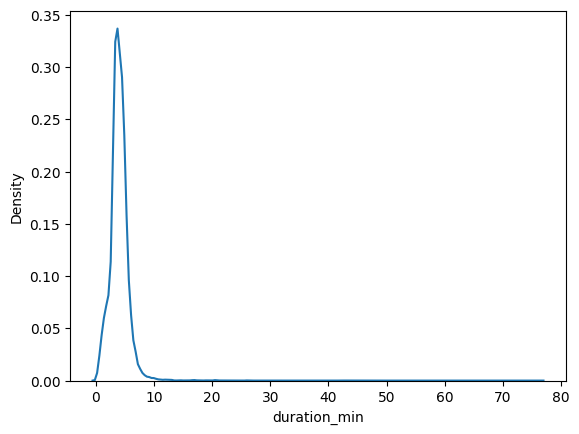

In [20]:
copy_data = data.copy()
# copy_data['duration_ms'].describe()
# # convert duration to minutes
copy_data['duration_min'] = copy_data['duration_ms'] / 60000
# # find tresholds for outliers
# Q1 = copy_data['duration_min'].quantile(0.25)
# Q3 = copy_data['duration_min'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # remove outliers
# outlierless_data = copy_data[(copy_data['duration_min'] > lower_bound) & (copy_data['duration_min'] < upper_bound)]

# plot duration distribution
sns.kdeplot(copy_data['duration_min'])


In [21]:
# # correlation with popularity
# data[['duration_ms', 'popularity']].corr()
# data['duration_min'] = data['duration_ms'] / 60000
# print correlations with and without outliers
# print("With outliers:")
print(copy_data[['duration_min', 'popularity']].corr())
# print()
# print("Without outliers:")
# print(outlierless_data[['duration_min', 'popularity']].corr())


              duration_min  popularity
duration_min      1.000000   -0.039676
popularity       -0.039676    1.000000


Negative correlation slightly below the treshhold of 0.05. Might make a difference to exclude outliers.

*clean up nan values and inspect correlated attributes to popularity*

In [22]:
copy_data = data.copy()
for i in ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']:
    copy_data[i] = copy_data[i].replace(-1, np.nan)

copy_data = copy_data.dropna()

num_copy_data = copy_data.select_dtypes(include=['float64', 'int64']).drop(columns=['time_signature', 'key', 'mode', 'duration_ms'])


corr = num_copy_data.corr()['popularity'].sort_values(ascending=False)

corr



popularity          1.000000
loudness            0.201290
energy              0.147368
danceability        0.042119
tempo               0.027663
year                0.015141
valence             0.009249
liveness           -0.012454
duration_min       -0.040229
speechiness        -0.053599
instrumentalness   -0.127006
acousticness       -0.138459
Name: popularity, dtype: float64

*contrary to previous assumption, despite the three major keys c,g,d being the most popular (which are usually associated with happy mood) here, valence has the smallest correlation with popularity of a track(valence describes musical positivity of the track)*

Relevant correlations to popularity:
positive:
- loudness (0.20)
- energy (0.15)

negative:
- acousticness (-0.14)
- instrumentalness (-0.13)
- speechiness (-0.05)

Text(0.5, 1.0, 'Energy vs Popularity')

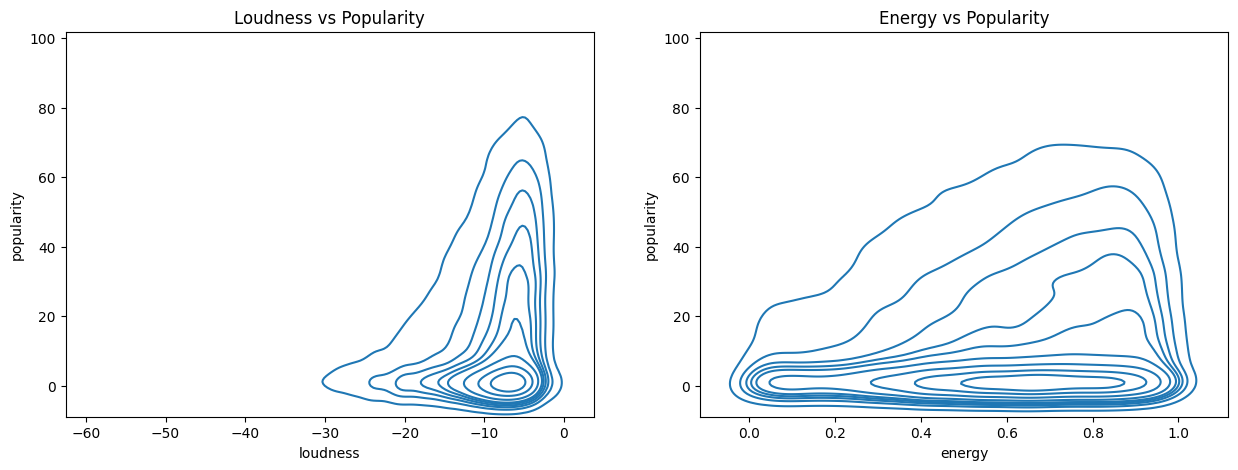

In [59]:
# plot loudness against popularity, energy against popularity
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(x='loudness', y='popularity',data=num_copy_data, ax=ax[0])
ax[0].set_title('Loudness vs Popularity')
sns.kdeplot(x='energy', y='popularity',data=num_copy_data, ax=ax[1])
ax[1].set_title('Energy vs Popularity')

Text(0.5, 1.0, 'Speechiness vs Popularity')

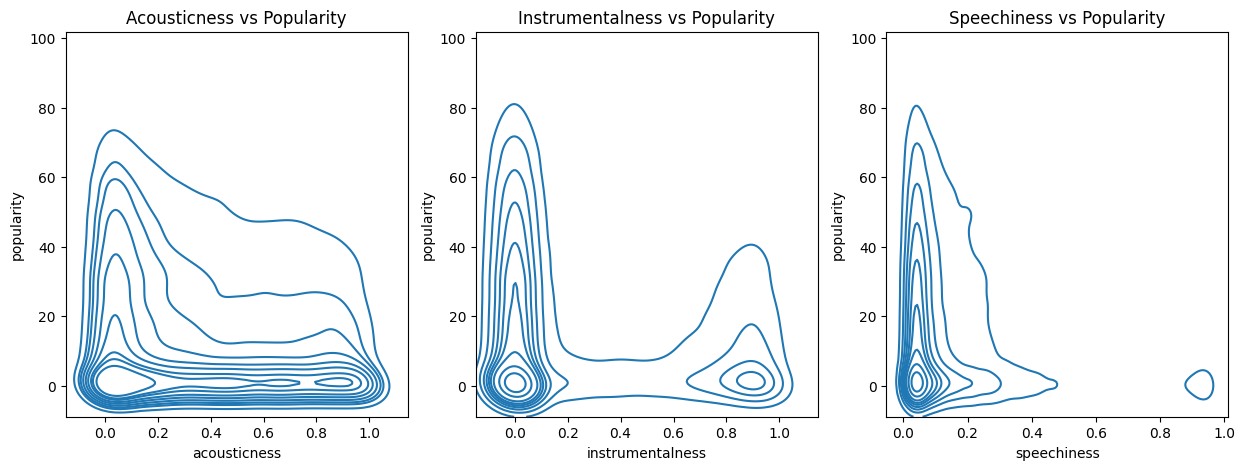

In [60]:
# plot acousticness instrumentalness and speechiness against popularity
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(x='acousticness', y='popularity',data=num_copy_data, ax=ax[0])
ax[0].set_title('Acousticness vs Popularity')
sns.kdeplot(x='instrumentalness', y='popularity',data=num_copy_data, ax=ax[1])
ax[1].set_title('Instrumentalness vs Popularity')
sns.kdeplot(x='speechiness', y='popularity',data=num_copy_data, ax=ax[2])
ax[2].set_title('Speechiness vs Popularity')

^ trosku kontradikcia instrumentalness a speechiness. instrumentalness -> cim viac je pesnicka pure instrumental, tym menej popularna, speechiness -> cim viac je pesnicka pure speech, tym menej je popularna. zo speechiness grafu tiez vidime ze najviac popularnych piesni ma hodnotu speechiness blizko nuly.

***OUTLIER ANALYSIS***

In previous cells we found attributes which had some significant outliers. The next step is looking at the data and seeing if removing outliers would make a difference. 

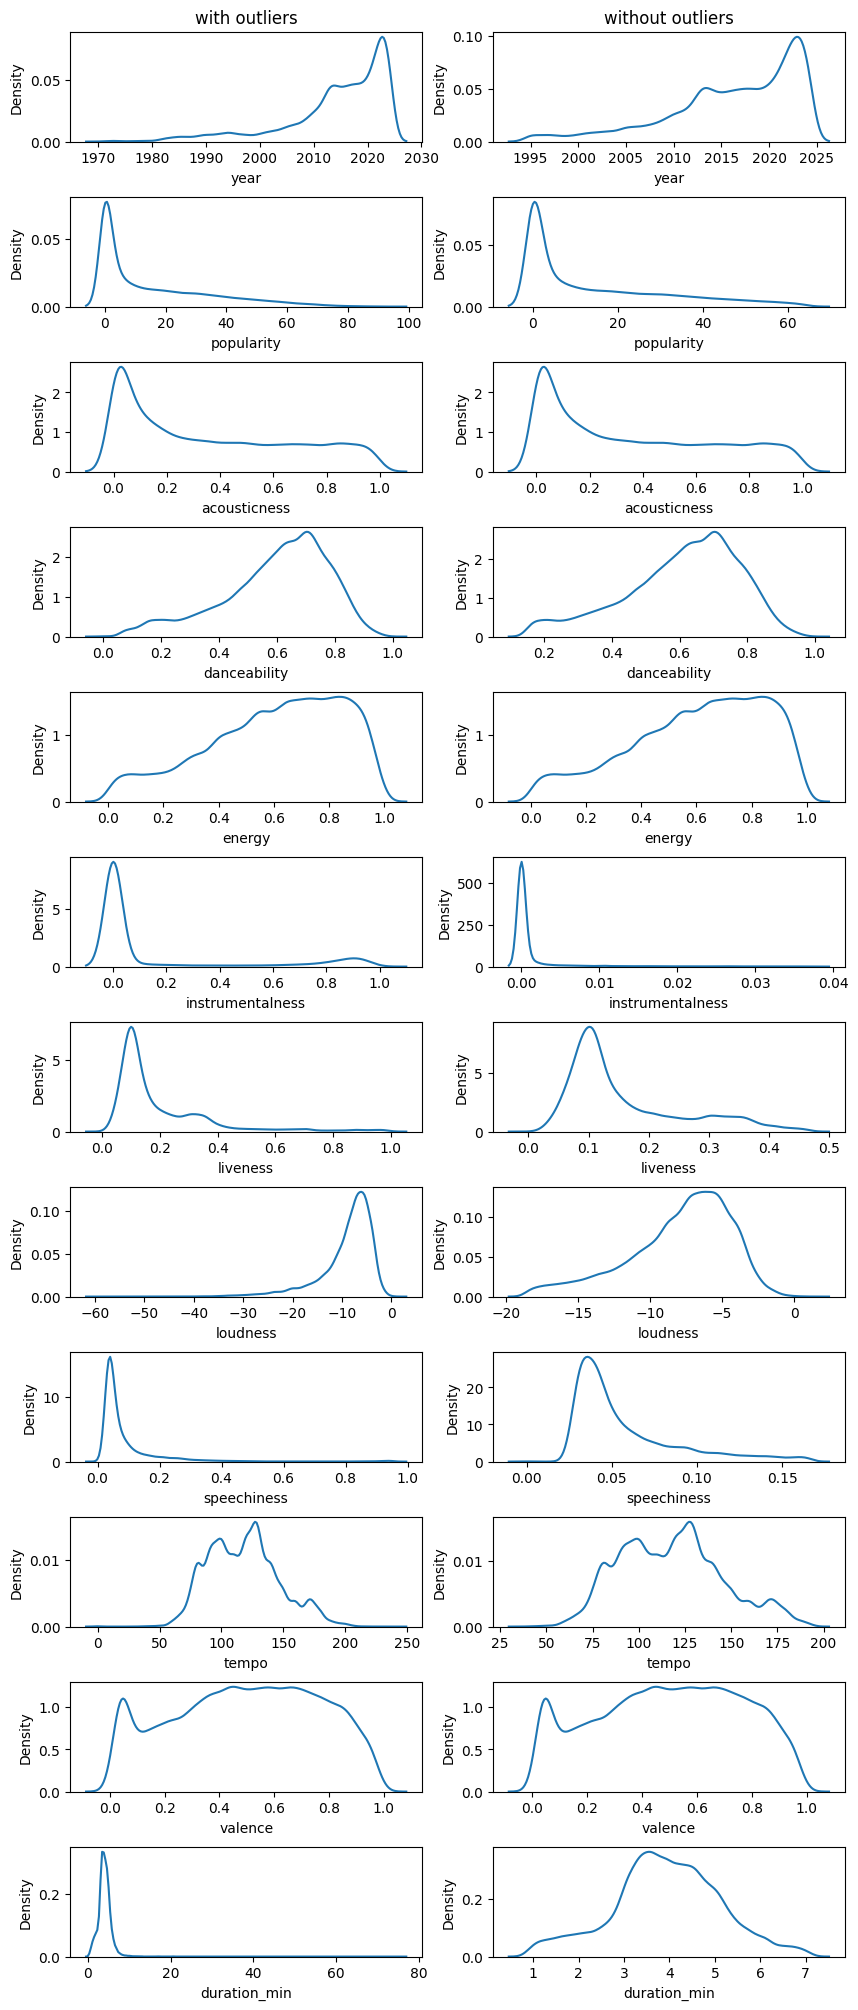

In [62]:
# calculate outlier thresholds
Q1 = num_copy_data.quantile(0.25)
Q3 = num_copy_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# print(lower_bound)
# print(upper_bound)
# remove outlier
# s
outlierless_data = num_copy_data[(num_copy_data > lower_bound) & (num_copy_data < upper_bound)]
# plot before and after distributions for each
fig, ax = plt.subplots(12, 2, figsize=(10, 25))
# set gap between plots
plt.subplots_adjust(hspace=0.5)
i = 0
ax[0][0].set_title('with outliers')
ax[0][1].set_title('without outliers')
for col in num_copy_data.columns:
    sns.kdeplot(num_copy_data[col], ax=ax[i][0])
    sns.kdeplot(outlierless_data[col], ax=ax[i][1])
    i += 1

Text(0.5, 1.0, 'Correlation Difference')

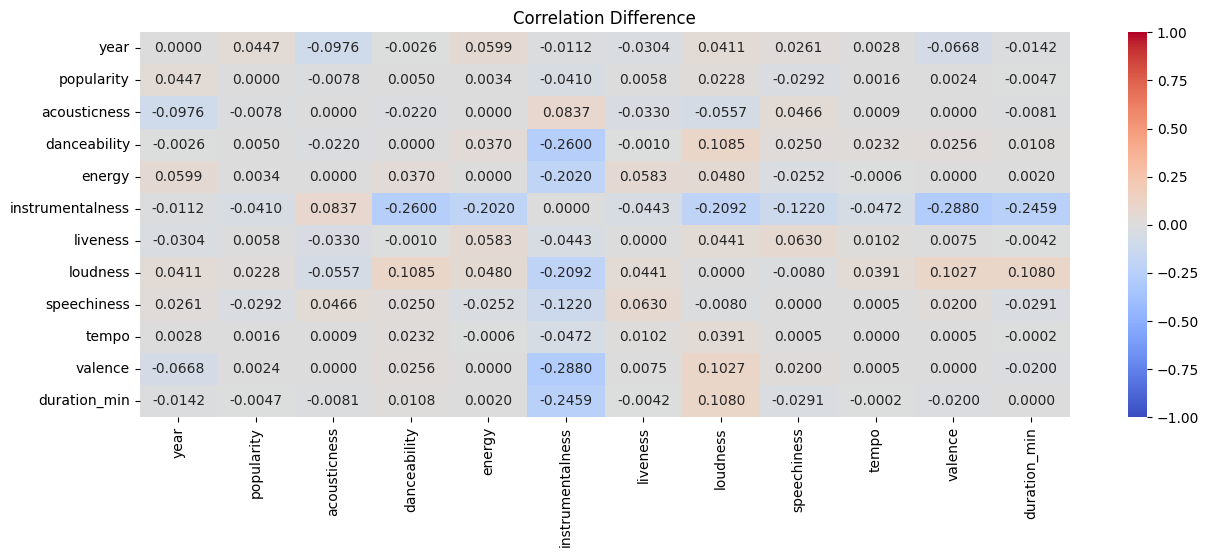

In [49]:
# correlation difference heatmap before and after removing outliers
corr = num_copy_data.corr(method='spearman')
corr_outlierless = outlierless_data.corr(method='spearman')

diff = corr - corr_outlierless

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.heatmap(diff, vmin=-1, vmax=1, annot=True, fmt='.4f', cmap='coolwarm')
ax.set_title('Correlation Difference')


We can see some significant correlation differences.

<Axes: >

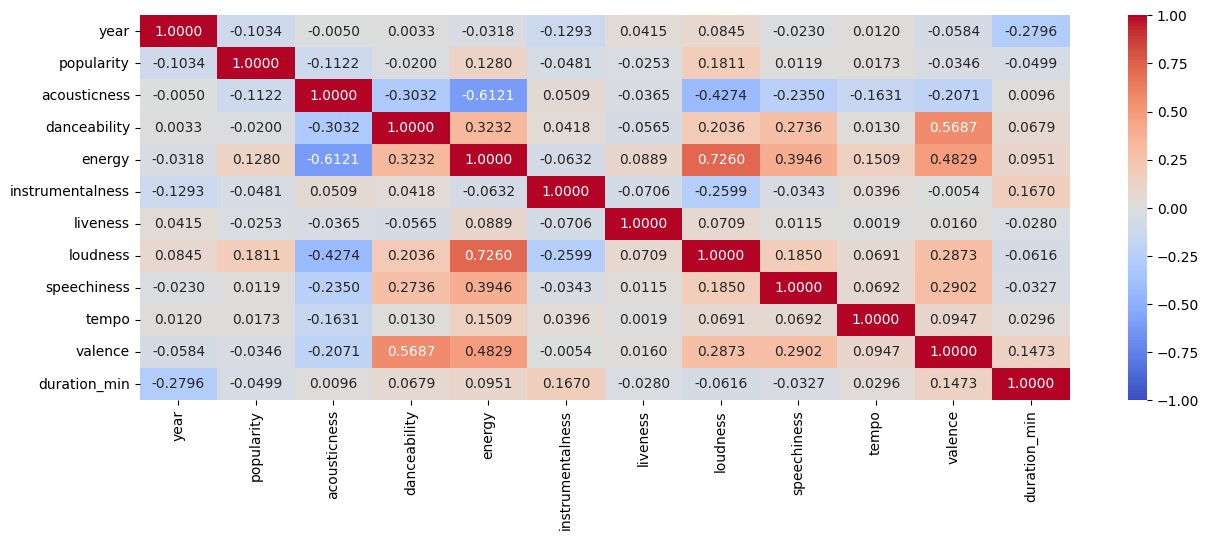

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.heatmap(corr_outlierless, vmin=-1, vmax=1, annot=True, fmt='.4f', cmap='coolwarm')

In [51]:
corr_outlierless['popularity'].sort_values(ascending=False)

popularity          1.000000
loudness            0.181142
energy              0.128008
tempo               0.017304
speechiness         0.011884
danceability       -0.019955
liveness           -0.025274
valence            -0.034576
instrumentalness   -0.048068
duration_min       -0.049931
year               -0.103414
acousticness       -0.112192
Name: popularity, dtype: float64

Text(0.5, 1.0, 'Energy vs Popularity')

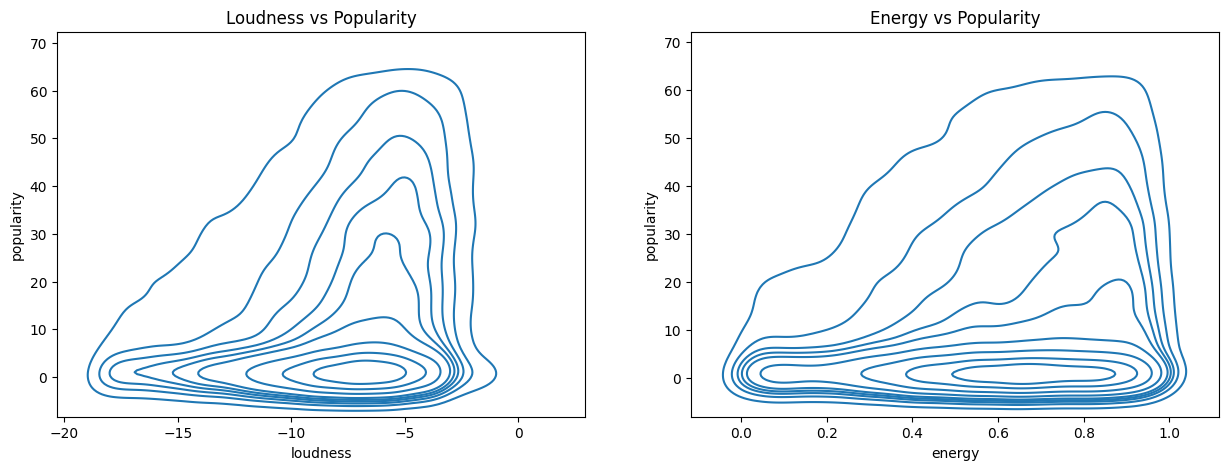

In [65]:
# plot loudness against popularity, energy against popularity
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(x='loudness', y='popularity',data=outlierless_data, ax=ax[0])
ax[0].set_title('Loudness vs Popularity')
sns.kdeplot(x='energy', y='popularity',data=outlierless_data, ax=ax[1])
ax[1].set_title('Energy vs Popularity')

Text(0.5, 1.0, 'Valence vs Popularity')

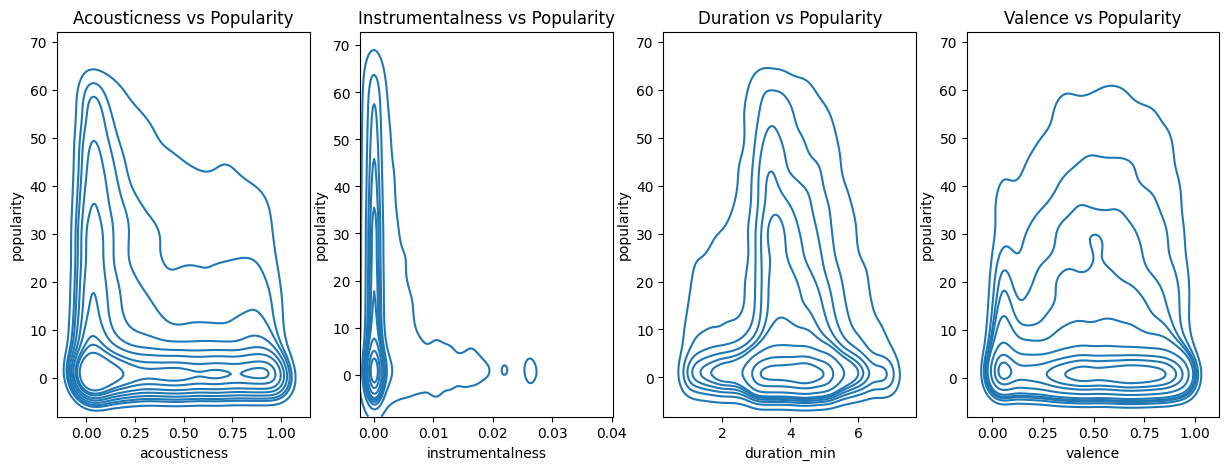

In [67]:
# plot acousticness year, duration_min, instumentalness and valence against popularity
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
sns.kdeplot(x='acousticness', y='popularity',data=outlierless_data, ax=ax[0])
ax[0].set_title('Acousticness vs Popularity')
sns.kdeplot(x='instrumentalness', y='popularity',data=outlierless_data, ax=ax[1])
ax[1].set_title('Instrumentalness vs Popularity')
sns.kdeplot(x='duration_min', y='popularity',data=outlierless_data, ax=ax[2])
ax[2].set_title('Duration vs Popularity')
sns.kdeplot(x='valence', y='popularity',data=outlierless_data, ax=ax[3])
ax[3].set_title('Valence vs Popularity')

